## Import des librairies

In [1]:
#indique à matplotlib d’afficher les graphiques “en ligne”
%matplotlib inline

# Importation des librairies pour la manipulation de données
import numpy as np
import pandas as pd

# Importation des librairies de visualisations
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

## Import des données

In [2]:
CheminFichier = r'Data\Dataset_Employes.xlsx'
Dataset_Employes = pd.read_excel(CheminFichier)
Dataset_Employes.head()

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion,Ancienneté_an,Distance domicile/Travail,Service,Niveau de satisfaction,Type Contrat,Age
0,1,CDI,35,9894.7000,13,0.0,0.0,22.5,69,Technique,60,Cadre,46
1,2,CDI,35,4296.7167,39,0.0,1.0,10.8,32,Technique,39,Non Cadre,55
2,3,CDI,35,3705.2167,29,1.0,1.0,13.0,68,RH,62,Cadre,52
3,4,CDI,35,1697.1500,17,1.0,0.0,21.7,59,Technique,98,Non Cadre,58
4,5,CDD,35,2848.3000,15,1.0,0.0,3.3,15,R&D,81,Non Cadre,39


# Agrandissement de la fenêtre

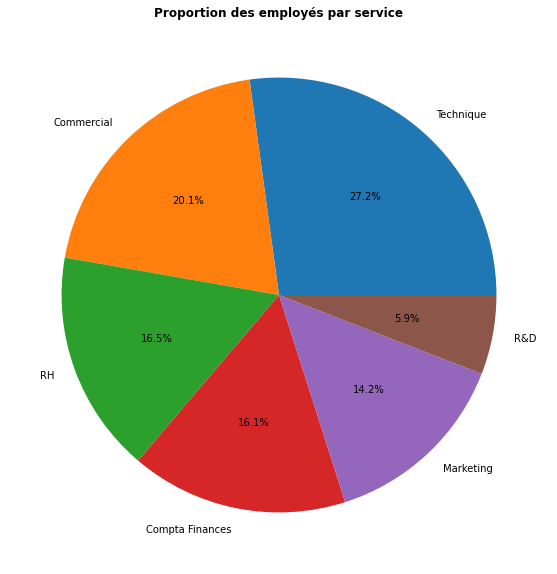

In [8]:
plt.figure(figsize=(10,10))

DFPie = Dataset_Employes['Service'].value_counts(normalize=True).mul(100)
NomService = DFPie.keys().tolist()
Valeurs = DFPie.tolist()


plt.pie(Valeurs, labels = NomService, autopct='%1.1f%%')
plt.title("Proportion des employés par service",fontweight="bold")

plt.show()

# Faire coincider plusieurs graphiques sur une fenêtre

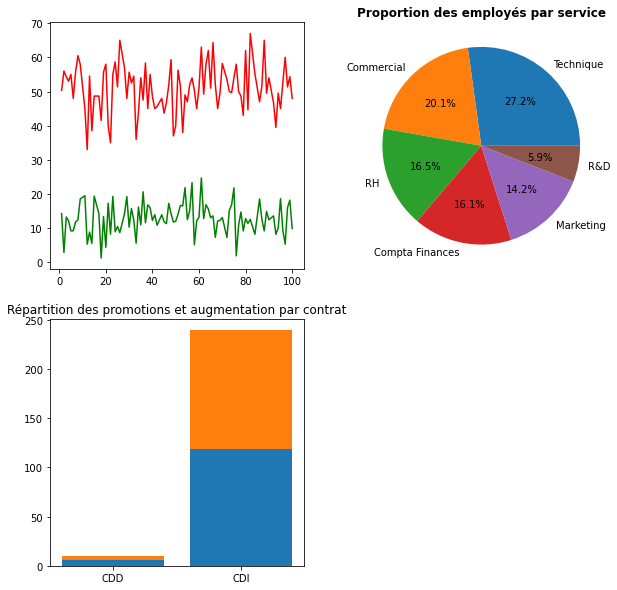

In [9]:
plt.figure(figsize=(10,10))

## Creation des courbes
Data_Group = Dataset_Employes.groupby(['Niveau de satisfaction'])['Age','Ancienneté_an'].mean()
Data_Group = Data_Group.reset_index()

plt.subplot(221)
plt.plot(Data_Group['Niveau de satisfaction'], Data_Group['Age'], color='red')
plt.plot(Data_Group['Niveau de satisfaction'], Data_Group['Ancienneté_an'], color='green')

## Creation du piechart
plt.subplot(222)
plt.pie(Valeurs, labels = NomService, autopct='%1.1f%%')
plt.title("Proportion des employés par service",fontweight="bold")

## Creation du diagramme en barres
DF = Data_Group = Dataset_Employes.groupby(['Contrat'])['Promotion','Augmentation'].sum()
DF = pd.DataFrame(DF).reset_index()

plt.subplot(223)
plt.bar(DF['Contrat'], DF['Augmentation'])
plt.bar(DF['Contrat'], DF['Promotion'], bottom=DF['Augmentation'])
plt.title("Répartition des promotions et augmentation par contrat")

plt.show()